In [5]:
import pandas as pd
from pathlib import Path

# --- Load the Cleaned Data ---
IN_PATH = Path('../../data/processed_data/ACSPUMS_CLEANED.csv')
df_analysis = pd.read_csv(IN_PATH)

In [ ]:
import numpy as np
import statsmodels.api as sm


povpip_mean = df_analysis['POVPIP'].mean()
df_analysis['POVPIP_c'] = df_analysis['POVPIP'] - povpip_mean


df_analysis['Immigrant_POVPIP_c'] = df_analysis['Is_Immigrant'] * df_analysis['POVPIP_c']


df_analysis['Limited_English_Household'] = (df_analysis['LNGI'] == 2).astype(int)


df_analysis['Speaks_Other_Language'] = (df_analysis['LANX'] == 1).astype(int)


X = df_analysis[['Is_Immigrant', 'POVPIP_c', 'AGEP', 'Immigrant_POVPIP_c', 
                 'Limited_English_Household', 'Speaks_Other_Language']]

X = sm.add_constant(X)


Y = df_analysis['Years_of_Schooling']

weights = df_analysis['PWGTP']

wls_model = sm.WLS(Y, X, weights=weights)
results = wls_model.fit(cov_type='HC0') 

print(results.summary())

                            WLS Regression Results                            
Dep. Variable:     Years_of_Schooling   R-squared:                       0.114
Model:                            WLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1972.
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:01:36   Log-Likelihood:            -4.3540e+05
No. Observations:              159869   AIC:                         8.708e+05
Df Residuals:                  159862   BIC:                         8.709e+05
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

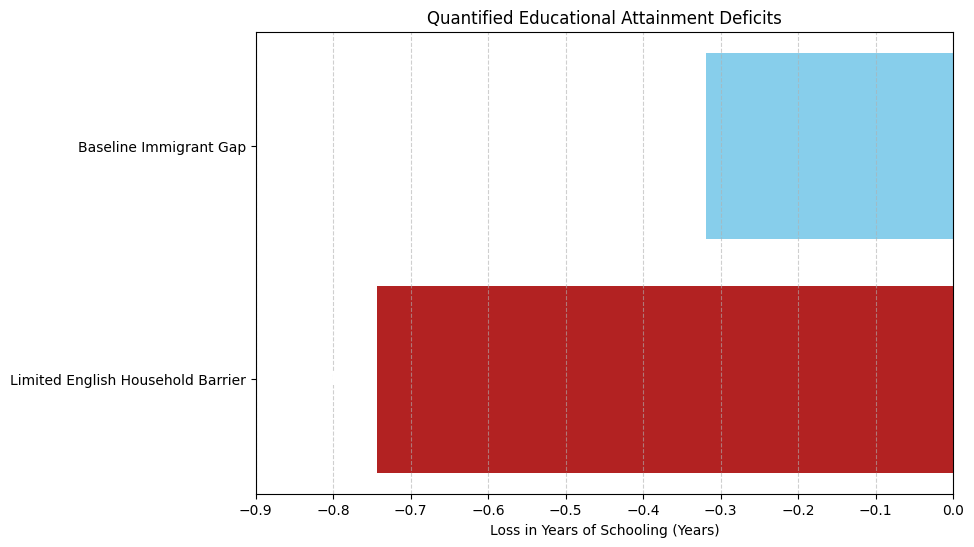

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Variable': ['Baseline Immigrant Gap', 'Limited English Household Barrier'],
    'Coefficient': [-0.3188, -0.7431] # Your final beta values
}
df_plot = pd.DataFrame(data)


plt.figure(figsize=(9, 6))
bars = plt.barh(df_plot['Variable'], df_plot['Coefficient'], color=['skyblue', 'firebrick'])

plt.xlabel('Loss in Years of Schooling (Years)')
plt.title('Quantified Educational Attainment Deficits')
plt.xlim(-0.9, 0) 


for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.05, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', 
             va='center', ha='right', color='white', fontsize=12, fontweight='bold')

plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

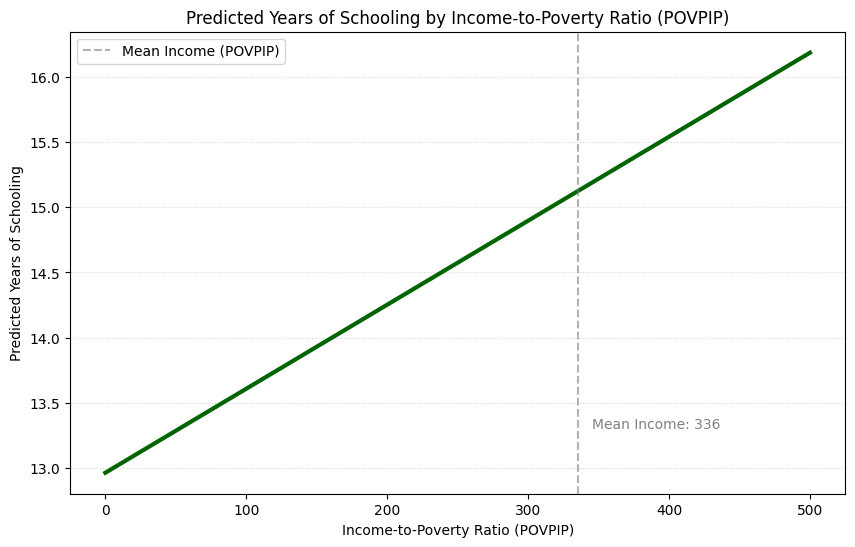

In [ ]:

agep_mean = 45.0 

povpip_range = np.linspace(0, 500, 100)
povpip_mean = 335.5720


povpip_centered = povpip_range - povpip_mean


X_pred = pd.DataFrame({
    'const': 1,
    'Is_Immigrant': 0, 
    'POVPIP_c': povpip_centered,
    'AGEP': agep_mean, 
    'Immigrant_POVPIP_c': 0, 
    'Limited_English_Household': 0, 
    'Speaks_Other_Language': 0
})

X_pred = X_pred[['const', 'Is_Immigrant', 'POVPIP_c', 'AGEP', 'Immigrant_POVPIP_c', 
                 'Limited_English_Household', 'Speaks_Other_Language']]


predicted_years = results.predict(X_pred)


plt.figure(figsize=(10, 6))
plt.plot(povpip_range, predicted_years, color='darkgreen', linewidth=3)


plt.axvline(povpip_mean, color='gray', linestyle='--', alpha=0.6, label='Mean Income (POVPIP)')
plt.text(povpip_mean + 10, plt.ylim()[0] + 0.5, f'Mean Income: {povpip_mean:.0f}', color='gray')

plt.title('Predicted Years of Schooling by Income-to-Poverty Ratio (POVPIP)')
plt.xlabel('Income-to-Poverty Ratio (POVPIP)')
plt.ylabel('Predicted Years of Schooling')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()
plt.show()

